### Medical Insurance Cost Prediction

*importing the dependencies*

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

*Data collection & analysis- Load into pandas dataframe*

In [6]:
data=pd.read_csv(r"C:\Users\Neha Mathew\OneDrive\Documents\Python Scripts\Data\Medical_Insurance_Cost\insurance.csv")

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Check for missing values*

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Statistical measure of dataset*

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* distribution of age value *

C:\Users\Neha Mathew\AppData\Local\Temp\ipykernel_23184\454659255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


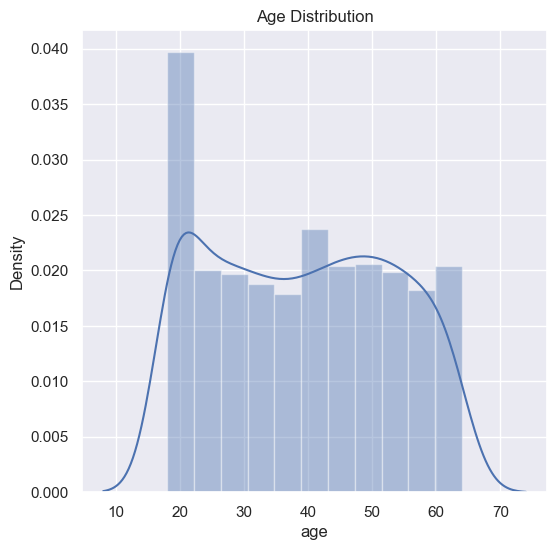

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

*Gender Column*

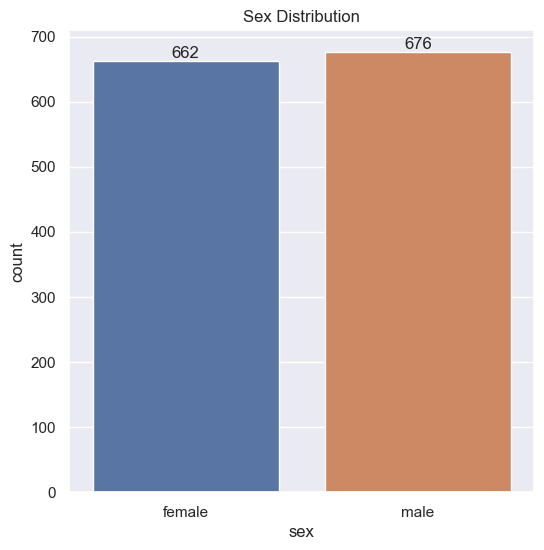

In [18]:
plt.figure(figsize=(6,6))
a=sns.countplot(x='sex', data = data)
plt.title('Sex Distribution')
for bars in a.containers:
    a.bar_label(bars)
plt.show()

In [17]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

*BMI Distribution*

C:\Users\Neha Mathew\AppData\Local\Temp\ipykernel_23184\1680175416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


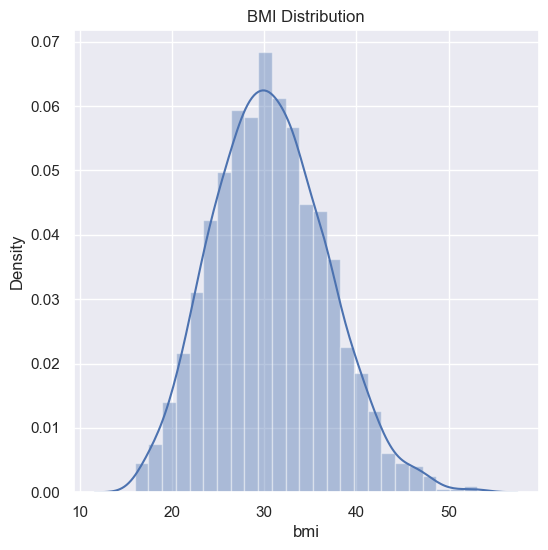

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

** Normal BMI range = 18.5-24.9

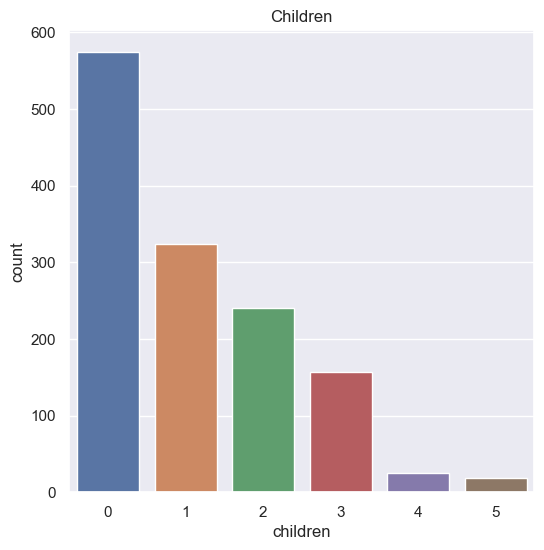

In [24]:
plt.figure(figsize=(6,6))
b=sns.countplot(x='children', data = data)
plt.title('Children')
for bars in a.containers:
    b.bar_label(bars)
plt.show()

In [25]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

*Smoker Column*

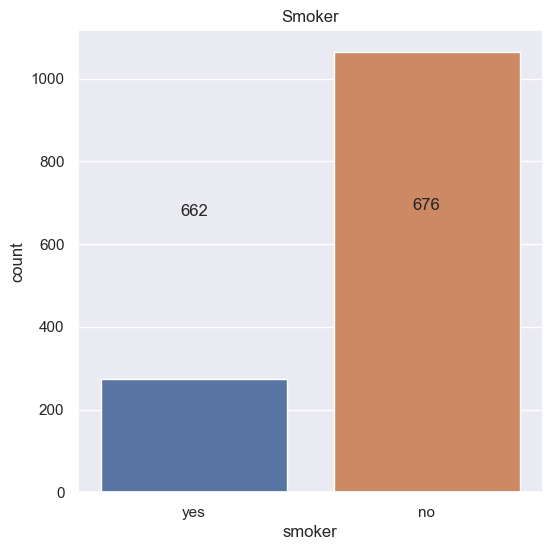

In [26]:
plt.figure(figsize=(6,6))
c=sns.countplot(x='smoker', data = data)
plt.title('Smoker')
for bars in a.containers:
    c.bar_label(bars)
plt.show()

* Region column *

<function matplotlib.pyplot.show(close=None, block=None)>

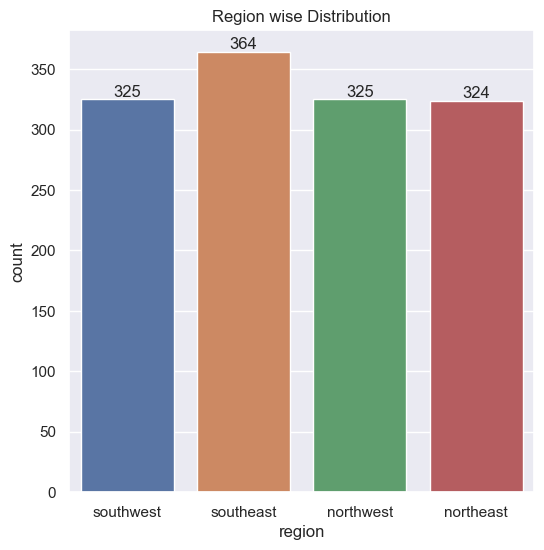

In [32]:
plt.figure(figsize=(6,6))
d=sns.countplot(data=data, x='region')
plt.title('Region wise Distribution')
for bars in d.containers:
    d.bar_label(bars)
plt.show

*Distribution of charge Value*

C:\Users\Neha Mathew\AppData\Local\Temp\ipykernel_23184\2301354515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


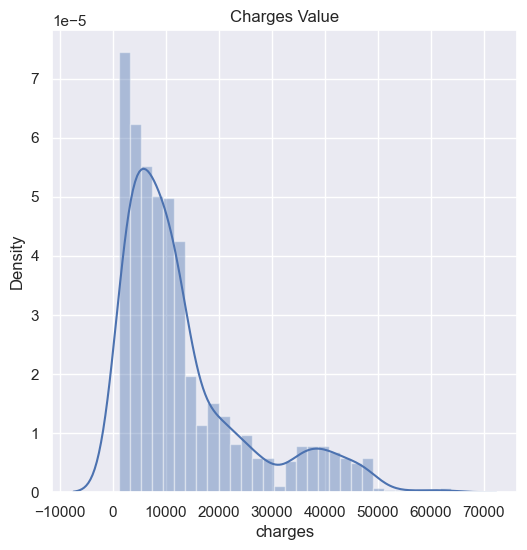

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Value')
plt.show()

### Data Preprocessing

*Encoding the categorical features*

* Encoding smoker column *

In [38]:
data.replace({'sex': {'male' : 0,'female' : 1}}, inplace= True)

In [39]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


* Encoding the smoker column *

In [40]:
data.replace({'smoker': {'yes' : 0,'no' : 1}}, inplace= True)

* Encoding the region column *

In [41]:
data.replace({'region': {'southeast' : 0,'southwest' : 1,'northeast' : 2,'northwest' : 3}}, inplace= True)

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the features and Target

In [53]:
x=data.drop(['charges'], axis =1)

In [54]:
y=data['charges']

In [55]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [56]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### splitting the data into training data and Test data

In [58]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=False)

In [59]:
print(x.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

*Loading the Linear Regression Model*

In [62]:
regressor=LinearRegression()

In [63]:
regressor.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [68]:
train_data_predict=regressor.predict(X_train)

*R Squared Value*

In [69]:
r2_train=metrics.r2_score(y_train,train_data_predict)
print('R squared value : ',r2_train)

R squared value :  0.7367384013702084


In [70]:
test_data_predict=regressor.predict(X_test)

In [71]:
r2_test=metrics.r2_score(y_test,test_data_predict)
print('R squared value : ',r2_test)

R squared value :  0.7989875396812892


In [87]:
regressor.score(X_test,y_test)

0.7989875396812892

### Building a predictive system

In [72]:
input_data=(31,1,25.74,0,1,0)

*changing input_data to a numpy array*

In [73]:
input_data_np_array=np.asarray(input_data)

*reshape the array*

In [74]:
input_data_reshaped=input_data_np_array.reshape(1,-1)

In [75]:
prediction=regressor.predict(input_data_reshaped)

C:\Users\Neha Mathew\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
print(prediction)

[3791.46686472]


In [85]:
print('The insurance is USD', prediction[0])

The insurance is USD 3791.466864716258
